In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras

In [4]:
tf.__version__


'1.14.0'

In [8]:
import pathlib
data_dir = pathlib.Path("/home/socky/tensorflow_jupyter/notebooks/tensorflow/tf2_tfrecord_loadimg/train")

In [9]:
print(data_dir)

/home/socky/tensorflow_jupyter/notebooks/tensorflow/tf2_tfrecord_loadimg/train


In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

20

In [11]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') ])
CLASS_NAMES

array(['cat', 'dog'], dtype='<U3')

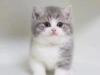

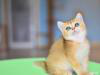

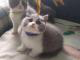

In [12]:
roses = list(data_dir.glob('cat/*'))
for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

In [13]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 4
IMG_HEIGHT = 100
IMG_WIDTH = 100
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
STEPS_PER_EPOCH

5.0

In [14]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 20 images belonging to 2 classes.


In [15]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(4):
      ax = plt.subplot(2,2,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

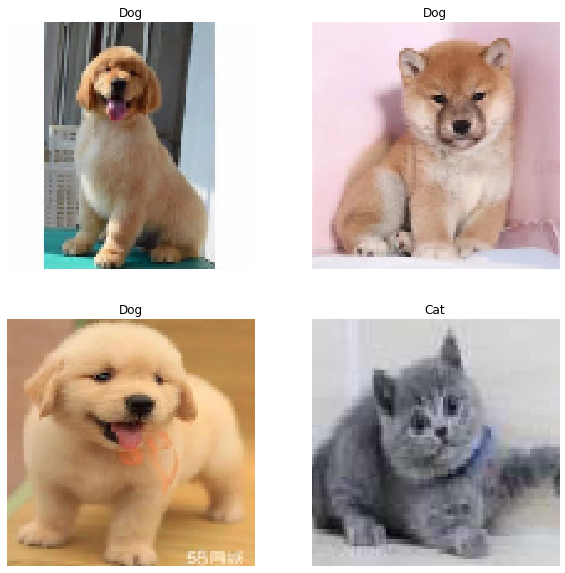

In [17]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [65]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [62]:
len(image_batch)

4